# About Dataset
CVDs Risk Prediction Using Personal Lifestyle Factors

Check my notebook here! 😄

BRFSS Dataset

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services.

Preprocessing of BRFSS Dataset

I preprocessed and cleaned the BRFSS Dataset. From 304 unique variables, I hand-picked 19 variables that relates to lifestyle factors of a person that can be contributed to being at risk with any form of Cardiovascular Diseases.

In [2]:
# Import all necessary libraries
import seaborn as sns
#sns.set()
sns.set(style="whitegrid")

import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# read and load file
df = pd.read_csv('downloads/CVD_cleaned.csv')
# head of the file
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
#checking Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
#shape of the data
df.shape

(308854, 19)

In [9]:
# data Statistics 
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
#check for null values
df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

# Univariate Analysis 

In [61]:
#value count for general health
gh = df['General_Health'].value_counts().sort_values(ascending = False)
gh

Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

<AxesSubplot:xlabel='General_Health', ylabel='count'>

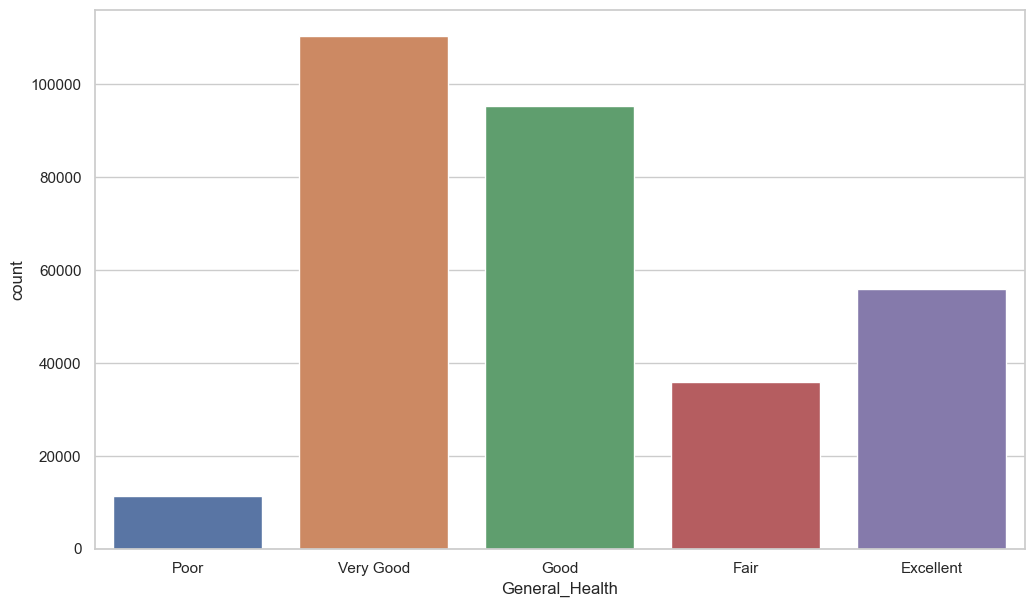

In [14]:
# plot bar chart
fig,ax =plt.subplots(figsize=(12,7))
sns.countplot(data=df, x='General_Health')

### Observation
### There are more people with very good health compared to others.

In [60]:
hd = df['Heart_Disease'].value_counts().sort_values(ascending = False)
hd

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

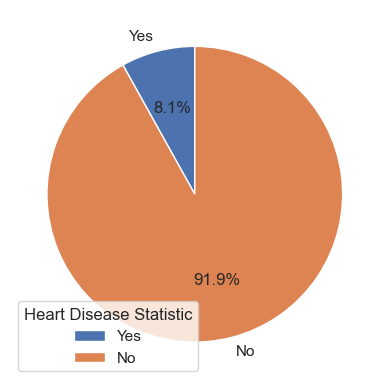

In [17]:
# plot pie chart
plt.pie(hd, labels = hd.index, autopct = '%1.1f%%', startangle = 90)
plt.legend(labels = hd.index,title= 'Heart Disease Statistic', loc = 'lower left')
plt.show()

In [59]:
#value count for Depression
dp = df['Depression'].value_counts().sort_values(ascending = False)
dp

No     246953
Yes     61901
Name: Depression, dtype: int64

<AxesSubplot:xlabel='Depression', ylabel='count'>

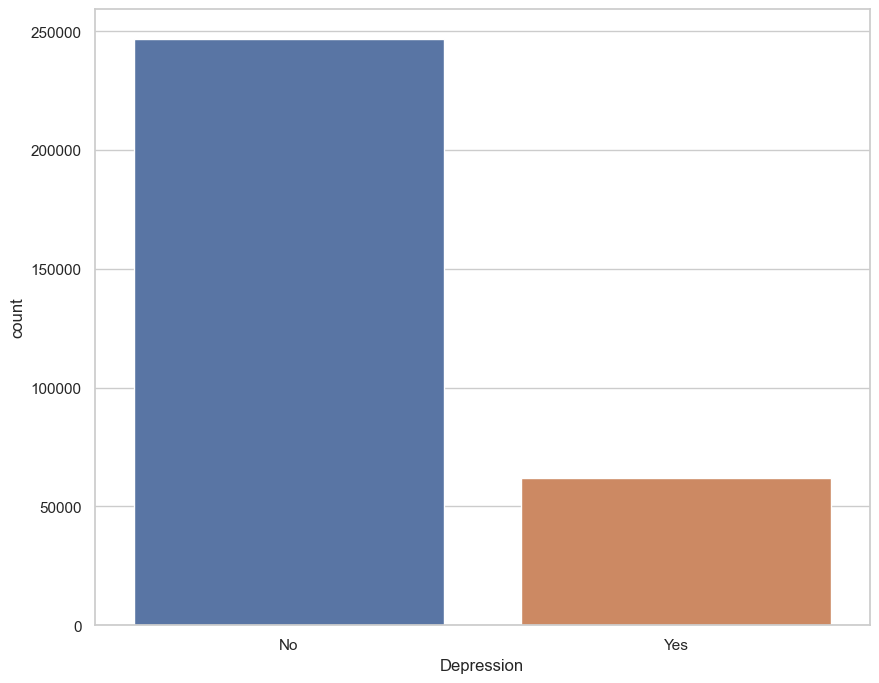

In [20]:
fig,ax =plt.subplots(figsize=(10,8))
sns.countplot(data=df, x='Depression')

### Observation
### There are Higher numbers of people who are not depressed compared to people that are depressed.

In [58]:
#value count for smokers
smoke = df['Smoking_History'].value_counts().sort_values(ascending = False)
smoke

No     183590
Yes    125264
Name: Smoking_History, dtype: int64

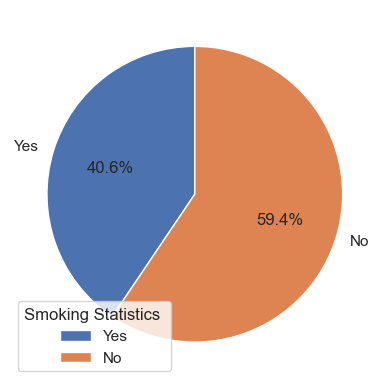

In [22]:
# plot pie chart
plt.pie(smoke, labels = smoke.index, autopct = '%1.1f%%', startangle = 90)
plt.legend(labels = smoke.index,title= 'Smoking Statistics ', loc = 'lower left')
plt.show()

# Observation
### There are Higher numbers of people who Don't smoke Compared to people who do.

In [62]:
#value count for Age category
age = df['Age_Category'].value_counts().sort_values(ascending = False)
age

65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49    20968
75-79    20705
35-39    20606
18-24    18681
30-34    18428
25-29    15494
Name: Age_Category, dtype: int64

<AxesSubplot:title={'center':'Age Distribution'}>

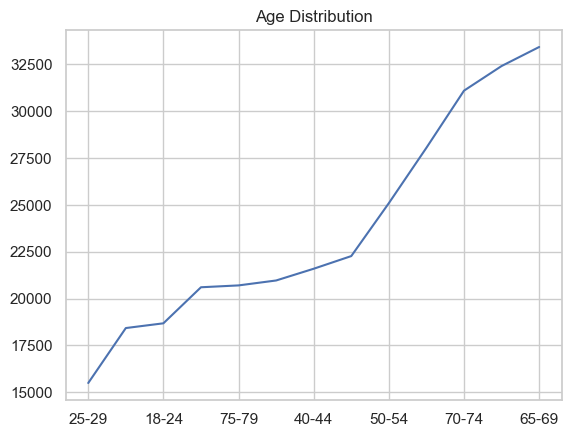

In [42]:
age.plot(title='Age Distribution')

### Observation
### There are Higher numbers of people in the Age Category 65-69 Compared to others.

# Bivariate Analysis

In [37]:
#value count for Smoking_History by Sex
ss= df['Smoking_History'].groupby(df.Sex).value_counts()
print(ss)

Sex     Smoking_History
Female  No                 100786
        Yes                 59410
Male    No                  82804
        Yes                 65854
Name: Smoking_History, dtype: int64


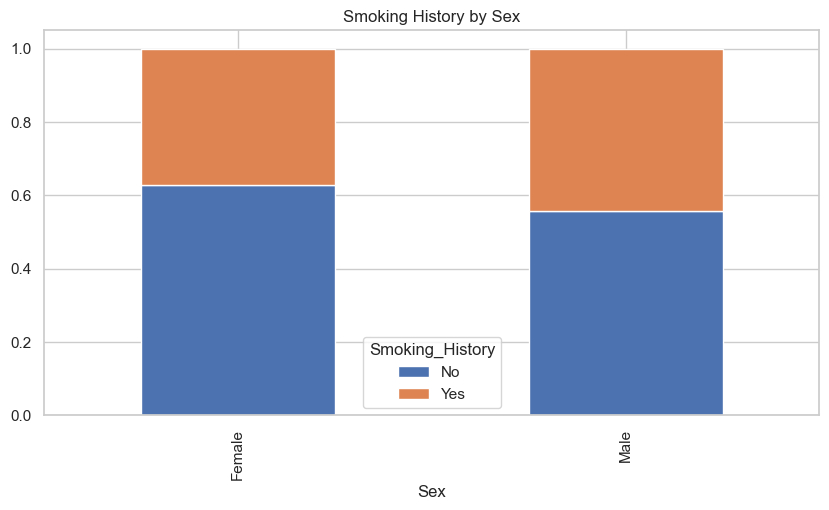

In [63]:
#create pivot of marital and job count
mar_job_pivot = pd.crosstab(df.Sex,  df.Smoking_History, normalize = 'index')

#plot the data
mar_job_pivot.plot.bar(stacked=True, figsize=(10,5))

plt.title('Smoking History by Sex')
plt.show()

### Observation
### There are more male smokers compared to females.

In [43]:
ghs= df['General_Health'].groupby(df.Sex).value_counts()
print(ghs)

Sex     General_Health
Female  Very Good         57877
        Good              49096
        Excellent         27805
        Fair              19306
        Poor               6112
Male    Very Good         52518
        Good              46268
        Excellent         28149
        Fair              16504
        Poor               5219
Name: General_Health, dtype: int64


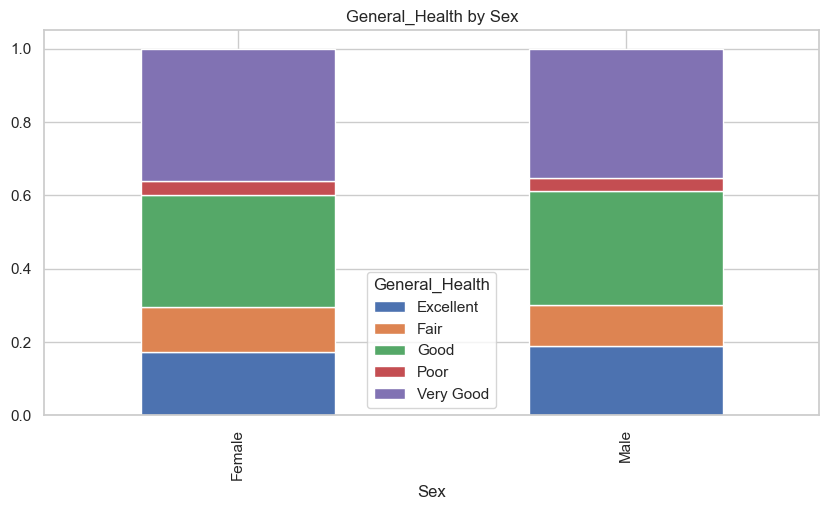

In [64]:
#create pivot of Sex and General health
mar_job_pivot = pd.crosstab(df.Sex,  df.General_Health, normalize = 'index')

#plot the data
mar_job_pivot.plot.bar(stacked=True, figsize=(10,5))

plt.title('General_Health by Sex')
plt.show()

<Figure size 2000x1000 with 0 Axes>

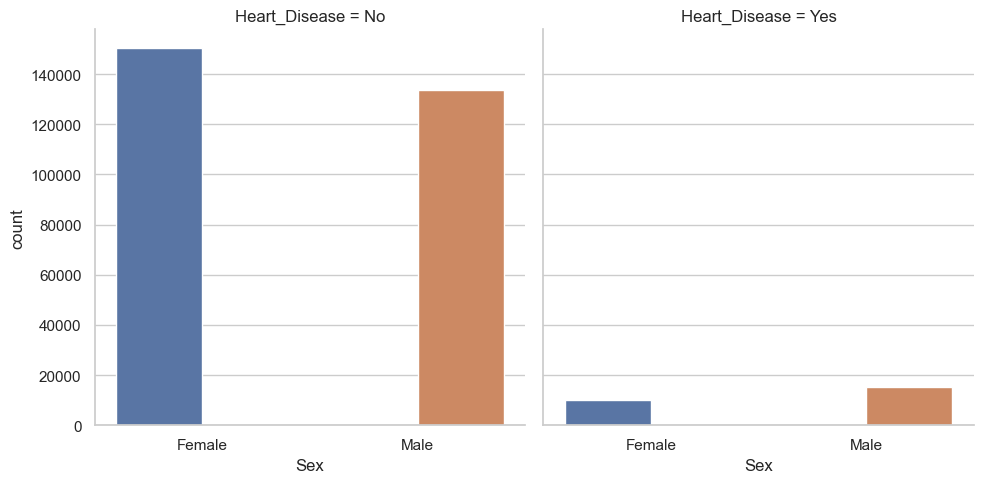

In [53]:
# visualizing housing a by loan
plt.figure(figsize = (20, 10))
sns.catplot(col = 'Heart_Disease', x = 'Sex', kind = 'count', data = df, hue = 'Sex')